In [1]:
# install dependencies
!pip install spotipy
!pip install seaborn
!pip install pandas
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# imports
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# set env vars for access keys
%env SPOTIPY_CLIENT_ID=dac9c636e3d341beaafb2960706c51c4
%env SPOTIPY_CLIENT_SECRET=2fdf9eb4d4744b1787a2cf069f6dd650

env: SPOTIPY_CLIENT_ID=dac9c636e3d341beaafb2960706c51c4
env: SPOTIPY_CLIENT_SECRET=2fdf9eb4d4744b1787a2cf069f6dd650


In [13]:
# authenticate and connect to spotify
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)
sp

In [14]:
# set the playlist id for playlist of interest

# in this case the spotify pride classics playlist
# https://open.spotify.com/playlist/37i9dQZF1DX59HcpGmPXYR?si=339e244b8a034120
playlist_id = "37i9dQZF1DX59HcpGmPXYR"

In [15]:
# get the playlist
playlist = sp.playlist(playlist_id)
playlist["name"]

'Pride Classics'

acousticness        60
analysis_url        60
danceability        60
duration_ms         60
energy              60
id                  60
instrumentalness    60
key                 60
liveness            60
loudness            60
mode                60
name                60
speechiness         60
tempo               60
time_signature      60
track_href          60
type                60
uri                 60
valence             60
dtype: int64

In [106]:
# create a pandas dataframe for the track details
df = pd.DataFrame()

# push each of the tracks into the pandas dataframe
for track_item in playlist["tracks"]["items"]:
    track = track_item["track"]
#     print(track)
    print(track["name"] + " by " + track["artists"][0]["name"] )
    # get the audio features of the track
    audio_features = sp.audio_features(track["id"])[0]
#     print(audio_features)
    audio_features["name"] = track["name"] + " by " + track["artists"][0]["name"]
    df = df.append(audio_features, ignore_index=True)


Rain On Me (with Ariana Grande) by Lady Gaga
You Make Me Feel (Mighty Real) by Sylvester
I Want To Break Free by Queen
Coconuts by Kim Petras
LUCID by Rina Sawayama
Levitating by Dua Lipa
Cool for the Summer by Demi Lovato
I'm Coming Out by Diana Ross
How to Be a Heartbreaker by MARINA
Dancing Queen by ABBA
Beg For You (feat. Rina Sawayama) by Charli XCX
Prisoner (feat. Dua Lipa) by Miley Cyrus
Born This Way by Lady Gaga
Heart to Break by Kim Petras
I Know A Place by MUNA
Into You by Ariana Grande
Hallucinate by Dua Lipa
Run Away With Me by Carly Rae Jepsen
Big Energy by Latto
Black Magic by Little Mix
Dancing On My Own by Robyn
MONTERO (Call Me By Your Name) by Lil Nas X
Bloom by Troye Sivan
Make Me Feel by Janelle Monáe
SloMo - Eurovision's Dancebreak Edit by Chanel
I'm Every Woman by Chaka Khan
Cut To The Feeling by Carly Rae Jepsen
Express Yourself by Madonna
Supermodel (You Better Work) by RuPaul
Nails, Hair, Hips, Heels by Todrick Hall
Break Free by Ariana Grande
Closer by Tegan 

In [160]:
# normalise the values to 0 - 1
df['tempo'] = df['tempo'] / df['tempo'].max() # nromalise 
df['key'] = df['key'] / df['key'].max()
df['loudness'] = (df['loudness'] + df['loudness'].min()) / df['loudness'].max()
# convert to long (tidy) form
dfm = df[['name', 'acousticness', 'danceability', 'energy', 'key', 'liveness', 'mode', 'tempo', 'valence']].melt('name', var_name='cols', value_name='vals')
dfm

,name,cols,vals
0,Rain On Me (with Ariana Grande) by Lady Gaga,acousticness,0.0210
1,You Make Me Feel (Mighty Real) by Sylvester,acousticness,0.0455
2,I Want To Break Free by Queen,acousticness,0.0478
3,Coconuts by Kim Petras,acousticness,0.0139
4,LUCID by Rina Sawayama,acousticness,0.0146
...,...,...,...
475,Crucified by Army Of Lovers,valence,0.4690
476,I Will Survive - Single Version by Gloria Gaynor,valence,0.5290
477,Freedom! '90 by George Michael,valence,0.8170
478,Tom's Diner by Suzanne Vega,valence,0.7250


/Users/benhosken/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/benhosken/Library/Python/3.8/lib/python/site-packages/seaborn/categorical.py:1296: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


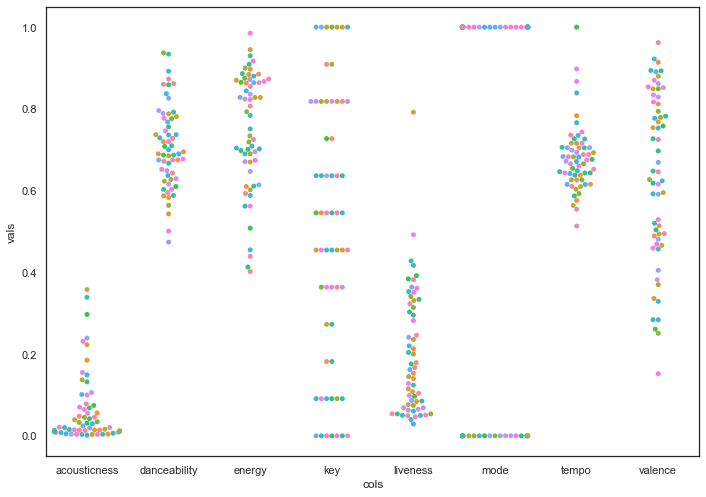

In [167]:
# Rough plot of the attributes
sns.set_theme(style='white')
g = sns.swarmplot(x="cols", y="vals", hue='name', data=dfm)
g.legend_.remove()


In [23]:
[pl["name"] for pl in sp.user_playlists(1230944528)["items"]]


['Skating',
 'Pure Binaural Beats – Binaural Beats Collection',
 'Synthwave',
 'Sleep-PL',
 'Hyp sleep',
 'Spaceykacey',
 '2020 top songs',
 'Skee Mask – Compro',
 'M People – Elegant Slumming',
 'Trinity Affirmations – Stop Talking to Yourself Affirmations',
 'Mark Ronson – Late Night Feelings',
 'Hypnosis',
 'Hamilton',
 'Khalid – Free Spirit',
 'Jóhann Jóhannsson – IBM 1401 A User’s Manual',
 'hawaii',
 'The Cranberries – Stars: The Best Of The Cranberries 1992-2002',
 'offline',
 'Empire of the Sun: Walking On A Dream 10th Anniversary',
 'Get Down Its Saturday Night',
 'St. Lucia Essentials',
 'modern italiodisco',
 'SHELTER LIVE TOUR',
 'R.E.M. – Automatic For The People',
 'This Is Empire of the Sun',
 'High And Low temp',
 'Binaural study beats',
 'euphoric',
 'The Office Stereo',
 'This Is George Michael',
 'Christmas BBQ',
 'Best songs ever',
 'Marconi Union – Weightless (Ambient Transmission Vol. 2)',
 'Season 3',
 'Sufjan Stevens – Carrie & Lowell',
 'hypnosis',
 'My Shazam 